In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
import imblearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

In [2]:
# read the data set

In [3]:
import os

In [4]:
os.getcwd()

'C:\\Users\\vivek\\PPLAUML'

In [5]:
import pandas as pd

In [6]:

#read the data set

In [7]:
data = pd.read_csv("loan_prediction.csv")

In [8]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [10]:
data.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [11]:
data.shape

(614, 13)

In [12]:
# handling missing values

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [14]:
# finding the sum of null values in each column

In [15]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
#filling missing values

In [17]:

data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
#replacing + with space for filling the non values
data['Dependents'] = data['Dependents'].str.replace('+','')
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mode()[0])
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0])
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mode()[0])
#data['LoanAmount'].fillna(value = data'LoanAmount'].mean(), inplace = True )


C:\Users\vivek\AppData\Local\Temp\ipykernel_2528\3433406654.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Dependents'] = data['Dependents'].str.replace('+','')


In [18]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [19]:
# handling catogorical values

In [20]:
# changing the datatype of each float column to int
data['CoapplicantIncome']=data['CoapplicantIncome'].astype('int64')
data['LoanAmount']=data['LoanAmount'].astype('int64')
data['Loan_Amount_Term']=data['Loan_Amount_Term'].astype('int64')
data['Credit_History']=data['Credit_History'].astype('int64')


In [21]:
# handling imbalance data

In [22]:
# balancing  the dataset by using smote
from imblearn.combine import SMOTETomek

In [23]:
#dividing the dataset into dependent and independent y and x respectively
y = data['Loan_Status']
x = data.drop(columns=['Loan_Status'],axis=1)

In [24]:
#exploratory data analysis 
#descriptive statistical
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.00000,614.000000,614.000000,614.000000
mean,5403.459283,1621.24430,145.465798,342.410423,0.855049
std,6109.041673,2926.24876,84.180967,64.428629,0.352339
min,150.000000,0.00000,9.000000,12.000000,0.000000
25%,2877.500000,0.00000,100.250000,360.000000,1.000000
50%,3812.500000,1188.50000,125.000000,360.000000,1.000000
75%,5795.000000,2297.25000,164.750000,360.000000,1.000000
max,81000.000000,41667.00000,700.000000,480.000000,1.000000


In [25]:
#visual analysis
#Univariate analysis

C:\Users\vivek\AppData\Local\Temp\ipykernel_2528\1445803926.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['ApplicantIncome'], color='r')
C:\Users\vivek\AppData\Local\Temp\ipykernel_2528\1445803926.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Credit_History'])


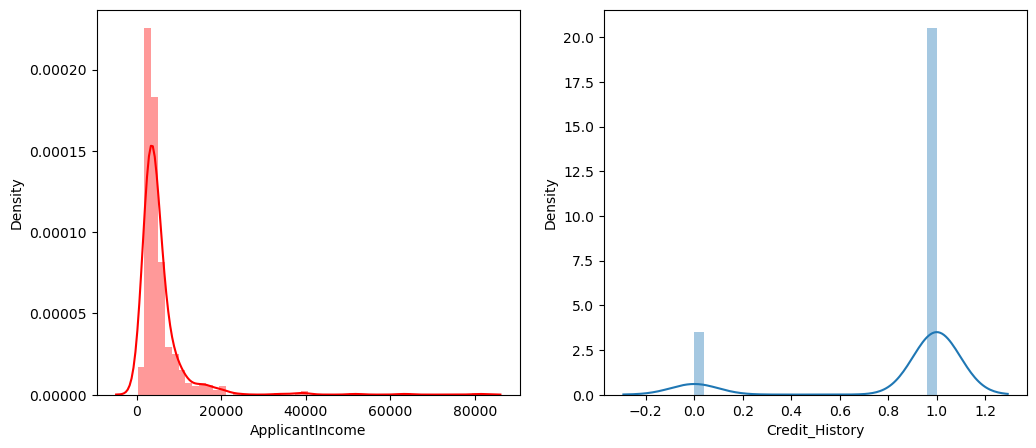

In [26]:
# plotting the using displot
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(data['ApplicantIncome'], color='r')
plt.subplot(122)
sns.distplot(data['Credit_History'])
plt.show()

In [27]:
#Bivariate analysis

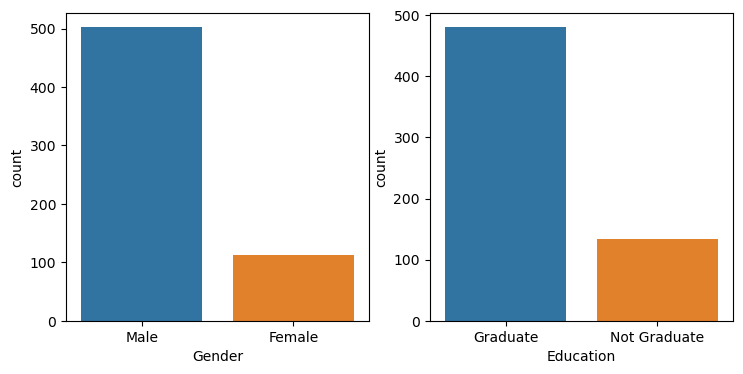

In [28]:
#plottiong the count plot
plt.figure(figsize=(18,4))
plt.subplot(1,4,1)
sns.countplot(x = data['Gender'])
plt.subplot(1,4,2)
sns.countplot(x = data['Education'])
plt.show()

<Axes: xlabel='Property_Area', ylabel='count'>

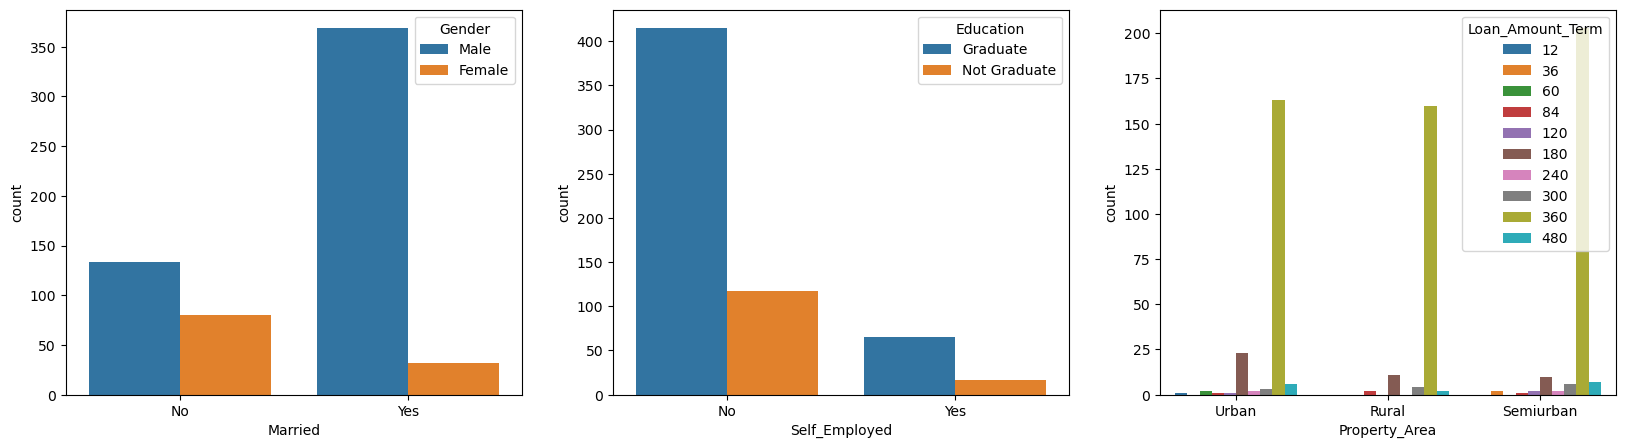

In [29]:
plt.figure(figsize=(20,5))
plt.subplot(131)
sns.countplot(x=data['Married'], hue=data['Gender'])
plt.subplot(132)
sns.countplot(x=data['Self_Employed'], hue=data['Education'])
plt.subplot(133)
sns.countplot(x=data['Property_Area'], hue=data['Loan_Amount_Term'])


In [30]:
#Multivariate analysis

C:\Users\vivek\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 45.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Gender', ylabel='ApplicantIncome'>

C:\Users\vivek\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 61.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\vivek\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


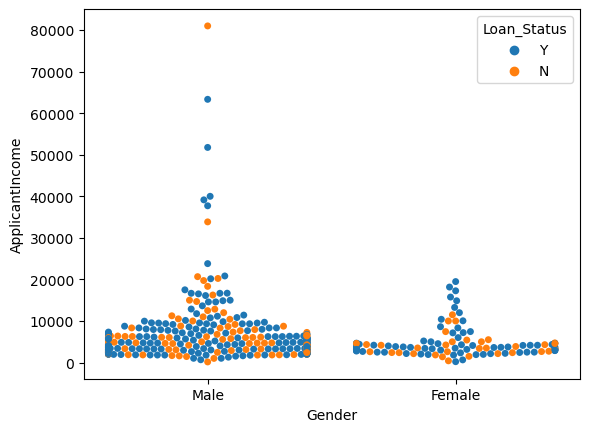

In [31]:
sns.swarmplot(x=data['Gender'],y=data['ApplicantIncome'], hue = data['Loan_Status'])

In [32]:
#Encoding data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
col = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
for i in col:
    data[i] = le.fit_transform(data[i])
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0,120,360,1,2,1
1,LP001003,1,1,1,0,0,4583,1508,128,360,1,0,0
2,LP001005,1,1,0,0,1,3000,0,66,360,1,2,1
3,LP001006,1,1,0,1,0,2583,2358,120,360,1,2,1
4,LP001008,1,0,0,0,0,6000,0,141,360,1,2,1


C:\Users\vivek\AppData\Local\Temp\ipykernel_2528\1439425145.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True)


<Axes: >

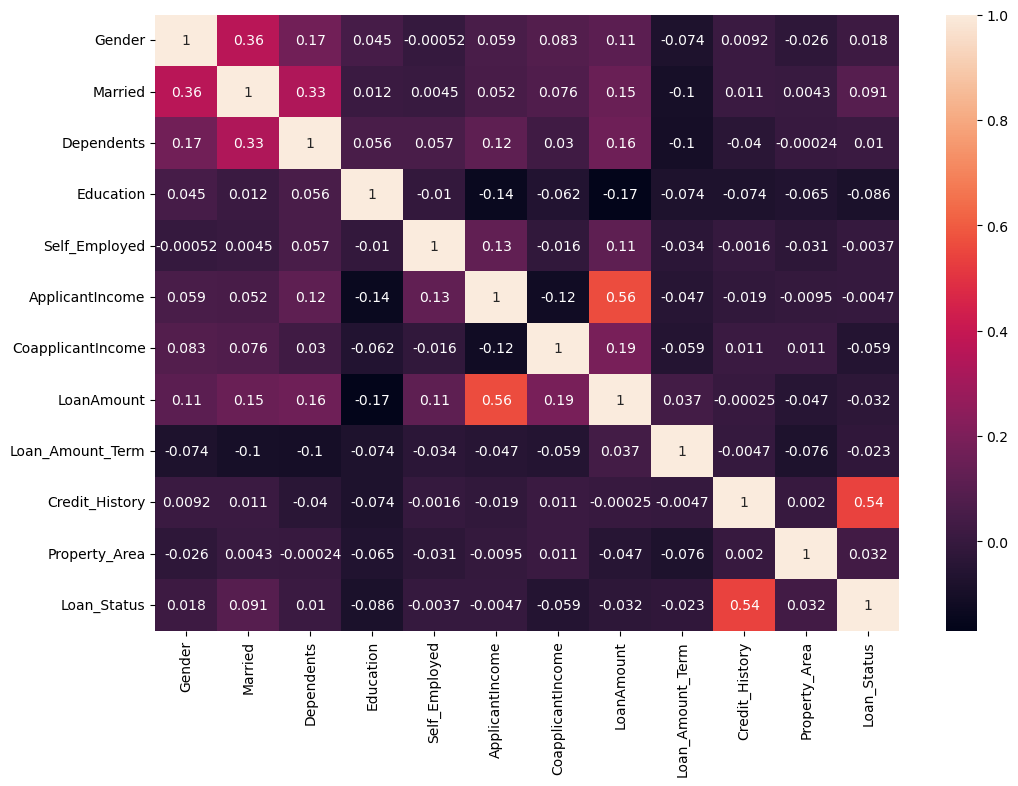

In [33]:
#Correlation Matrix
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot = True)

In [34]:
#Separating Features and Outcomes
X = data.loc[:,'Gender':'Property_Area'].values
Y = data.loc[:,'Loan_Status'].values

In [35]:
#Splitting dataset into Training and Test Data
from sklearn.model_selection import train_test_split 
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [36]:
# SPLITTING DATASET INTO TRAINING DATA

In [37]:
# scaling the data
# perfomimg features scaling opration using standard scaller on x part of the dataset because
# there different type of values in the columns
#Scaling the featues
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [38]:
# scaling the features

In [39]:
# model building

In [40]:
#activity 1 
# Decision Tree model

In [41]:
from sklearn.tree import DecisionTreeClassifier
def decisionTree(x_train,x_test, y_train, y_test):
    dt=DecisionTreeClassifier()
    dt.fit(x_train,y_train)
    yPred = dt.predict(x_test)
    print('***DecisionTreeClassifier***')
    print('Confusion matrix')
    print(confusion_matrix(y_test,yPred))
    print('Classfication report')
    print(classification_report(y_test,yPred))


In [42]:
#Random Forest model
def randomForest(x_train,x_test, y_train, y_test):
    rf=RandomForestClassifier()
    rf.fit(x_train,y_train)
    yPred = rf.predict(x_test)
    print('***RandomForestClassifier***')
    print('Confusion matrix')
    print(confusion_matrix(y_test,yPred))
    print('Classfication report')
    print(classification_report(y_test,yPred))

In [43]:
# KNN Model
def KNN(x_train,x_test, y_train, y_test):
    Knn=KNeighborsClassifier()
    Knn.fit(x_train,y_train)
    yPred = Knn.predict(x_test)
    print('***KNeighborsClassifier***')
    print('Confusion matrix')
    print(confusion_matrix(y_test,yPred))
    print('Classfication report')
    print(classification_report(y_test,yPred))

In [44]:
# Xgboost model
def Xgboost(x_train,x_test, y_train, y_test):
    xg=GradientBoostingClassifier()
    xg.fit(x_train,y_train)
    yPred = xg.predict(x_test)
    print('***GradientBoostingClassifier***')
    print('Confusion matrix')
    print(confusion_matrix(y_test,yPred))
    print('Classfication report')
    print(classification_report(y_test,yPred))

In [45]:
#ANN model
# importing the keras libraries and packages
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [46]:
# Initializing the ANN
classifier = Sequential()

In [47]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=100, activation='relu', input_dim=11))

In [48]:
# Adding Second hidden layer 
classifier.add(Dense(units=50, activation='relu'))

In [49]:
# Adding the output layer
classifier.add(Dense(units=1, activation='sigmoid'))

In [50]:
# compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [51]:
 #fitting the ANN to the training set
    #Splitting dataset into Training and Test Data
from sklearn.model_selection import train_test_split 
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)
model_history = classifier.fit(X_train, Y_train, batch_size=100, validation_split=0.2, epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 116ms/step - loss: 100.7548 - accuracy: 0.6921 - val_loss: 121.1063 - val_accuracy: 0.2771
Epoch 2/100
4/4 [==============================] - 0s 18ms/step - loss: 85.3675 - accuracy: 0.3628 - val_loss: 43.7215 - val_accuracy: 0.7349
Epoch 3/100
4/4 [==============================] - 0s 17ms/step - loss: 57.9897 - accuracy: 0.7073 - val_loss: 51.9609 - val_accuracy: 0.7229
Epoch 4/100
4/4 [==============================] - 0s 15ms/step - loss: 42.0968 - accuracy: 0.6921 - val_loss: 38.3110 - val_accuracy: 0.4096
Epoch 5/100
4/4 [==============================] - 0s 17ms/step - loss: 36.7998 - accuracy: 0.4329 - val_loss: 19.1348 - val_accuracy: 0.7229
Epoch 6/100
4/4 [==============================] - 0s 16ms/step - loss: 37.5322 - accuracy: 0.7043 - val_loss: 41.8906 - val_accuracy: 0.7229
Epoch 7/100
4/4 [==============================] - 0s 15ms/step - loss: 33.4212 - accuracy: 0.6707 - val_loss: 24.9403 - val_accuracy: 0.4699
Epo

Epoch 59/100
4/4 [==============================] - 0s 13ms/step - loss: 7.7477 - accuracy: 0.6220 - val_loss: 1.9770 - val_accuracy: 0.5301
Epoch 60/100
4/4 [==============================] - 0s 13ms/step - loss: 5.8598 - accuracy: 0.6860 - val_loss: 8.4871 - val_accuracy: 0.4940
Epoch 61/100
4/4 [==============================] - 0s 14ms/step - loss: 8.9809 - accuracy: 0.5793 - val_loss: 7.9383 - val_accuracy: 0.7229
Epoch 62/100
4/4 [==============================] - 0s 14ms/step - loss: 6.3416 - accuracy: 0.5610 - val_loss: 7.2758 - val_accuracy: 0.6627
Epoch 63/100
4/4 [==============================] - 0s 14ms/step - loss: 6.3033 - accuracy: 0.6890 - val_loss: 4.7695 - val_accuracy: 0.4458
Epoch 64/100
4/4 [==============================] - 0s 14ms/step - loss: 4.1692 - accuracy: 0.6311 - val_loss: 3.1237 - val_accuracy: 0.7229
Epoch 65/100
4/4 [==============================] - 0s 14ms/step - loss: 2.1259 - accuracy: 0.6829 - val_loss: 4.8693 - val_accuracy: 0.7349
Epoch 66/100


In [52]:
#testing the model Gender Married Dependents Education Self_Employed ApplicantIncome CoapplicantIncome LoanAmount Loan_Amount_Term Credit_History
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)
dt.predict([[1,1, 0, 1, 1, 4276, 1542, 145, 240, 0,1]])

array([0])

In [53]:
#testing the model Gender Married Dependents Education Self_Employed ApplicantIncome CoapplicantIncome LoanAmount Loan_Amount_Term Credit_History
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
rf.predict([[1,1, 0, 1, 1, 4276, 1542,145, 240, 0,1]])

array([0])

In [54]:
#testing the model Gender Married Dependents Education Self_Employed ApplicantIncome CoapplicantIncome LoanAmount Loan_Amount_Term Credit_History
Knn=KNeighborsClassifier()
Knn.fit(X_train,Y_train)
Knn.predict([[1,1, 0, 1, 1, 4276, 1542,145, 240, 0,1]])

array([1])

In [55]:
#testing the model Gender Married Dependents Education Self_Employed ApplicantIncome CoapplicantIncome LoanAmount Loan_Amount_Term Credit_History
xg=GradientBoostingClassifier()
xg.fit(X_train,Y_train)
xg.predict([[1,1, 0, 1, 1, 4276, 1542,145, 240, 0,1]])

array([0])

In [56]:
classifier.save("loan.h5")

In [57]:
# predicting the test set results
y_pred = classifier.predict(X_test)

7/7 [==============================] - 0s 3ms/step


In [58]:
y_pred

array([[1.0000000e+00],
       [1.0000000e+00],
       [9.9999994e-01],
       [9.9999899e-01],
       [9.9999285e-01],
       [9.9204918e-03],
       [1.0000000e+00],
       [9.9999940e-01],
       [1.2955884e-06],
       [1.0000000e+00],
       [1.0000000e+00],
       [2.0892385e-03],
       [9.9943227e-01],
       [8.4812081e-01],
       [9.8140043e-01],
       [9.1663736e-01],
       [9.9978220e-01],
       [5.1679081e-06],
       [4.3675172e-06],
       [1.0000000e+00],
       [2.5190953e-02],
       [2.1718481e-07],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [2.0078121e-05],
       [1.5808678e-03],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.9993289e-01],
       [2.9224819e-05],
       [1.4205301e-02],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.3054754e-05],
       [1.0000000e+00],
       [9.7714674e-01],
       [7.4048185e-01],
       [1.0000000e+00],
       [7.704212

In [59]:
y_pred = (y_pred > 0.5)
y_pred

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [

In [60]:
def predict_exit(sample_value):
    # convert list to numpy array
    sample_value = np.array(sample_value)
    # Reshape because sample_value contains 1 record
    sample_value = sample_value.reshape(1, -1)
    # Feature Scaling
    sample_value = sc.transform(sample_value)
    return classifier.predict(sample_value)

In [61]:
# predictions
# value order 'CreditScore','Age','Tenure','Balance','NumOfproducts','HasCrCard','IsActiveMember','EstimatedSalary','France','Germany','Spain','Female','Male'.
import tensorflow
sample_value = [[1,1, 0, 1, 1, 4276, 1542,145, 240, 0,1]]
if predict_exit(sample_value)>1.0:
    print('Prediction: High chance of Loan Approval!')
else:
    print('Prediction: low chance of Loan Approval.')

1/1 [==============================] - 0s 66ms/step
Prediction: low chance of Loan Approval.


In [62]:
# predictions
# value order 'CreditScore','Age','Tenure','Balance','NumOfproducts','HasCrCard','IsActiveMember','EstimatedSalary','France','Germany','Spain','Female','Male'.
import tensorflow
sample_value = [[1,0, 1, 1, 1, 45, 14,45, 240, 1,1]]
if predict_exit(sample_value)>0.5:
    print('Prediction: High chance of Loan Approval!')
else:
    print('Prediction: low chance of Loan Approval.')

1/1 [==============================] - 0s 27ms/step
Prediction: low chance of Loan Approval.


In [63]:
# Performance Testing & Hyperparameter Tuning

In [64]:
# compare the model
def compareMdodel(X_train,X_test,y_train,y_test):
    decisionTree(X_train,X_test,y_train,y_test)
    print('-'*100)
    randomForest(X_train,X_test,y_train,y_test)
    print('-'*100)
    Xgboost(X_train,X_test,y_train,y_test)
    print('-'*100)
    KNN(X_train,X_test,y_train,y_test)
    print('-'*100)

In [65]:
compareMdodel(X_train,X_test,Y_train,Y_test)

***DecisionTreeClassifier***
Confusion matrix
[[ 33  39]
 [ 30 101]]
Classfication report
              precision    recall  f1-score   support

           0       0.52      0.46      0.49        72
           1       0.72      0.77      0.75       131

    accuracy                           0.66       203
   macro avg       0.62      0.61      0.62       203
weighted avg       0.65      0.66      0.65       203

----------------------------------------------------------------------------------------------------
***RandomForestClassifier***
Confusion matrix
[[ 38  34]
 [  8 123]]
Classfication report
              precision    recall  f1-score   support

           0       0.83      0.53      0.64        72
           1       0.78      0.94      0.85       131

    accuracy                           0.79       203
   macro avg       0.80      0.73      0.75       203
weighted avg       0.80      0.79      0.78       203

-----------------------------------------------------------------

In [66]:
ypred = classifier.predict(X_test)
print(accuracy_score(y_pred,Y_test))
print("ANN Model")
print("Confusion_Matrix")
print(confusion_matrix(Y_test,y_pred))
print("Classification Report")
print(classification_report(Y_test,y_pred))

7/7 [==============================] - 0s 3ms/step
0.5270935960591133
ANN Model
Confusion_Matrix
[[22 50]
 [46 85]]
Classification Report
              precision    recall  f1-score   support

           0       0.32      0.31      0.31        72
           1       0.63      0.65      0.64       131

    accuracy                           0.53       203
   macro avg       0.48      0.48      0.48       203
weighted avg       0.52      0.53      0.52       203



In [67]:
# comparing model accuracy before & after applying hyperparameter tuning

In [68]:
from sklearn.model_selection import cross_val_score

In [69]:
# Radom forest model is selected
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)
yPred = rf.predict(X_test)

In [70]:
f1_score(y_pred,Y_test,average='weighted')

0.5302937145820216

In [71]:
cv = cross_val_score(rf,X,Y,cv=5)

In [72]:
np.mean(cv)

0.7785152605624417

In [73]:
#model Deployment

In [74]:
#save the best model

In [75]:
# saving the model by using pickle function
#model=RandomForestClassifier()
#model.fit(X_train, Y_train)
#y1_pred=model.predict(X_test)
model=GradientBoostingClassifier()
model.fit(X_train, Y_train)
pickle.dump(model,open('gb.pkl','wb'))

In [76]:
#model = pickle.load(open('rdf.pkl','rb'))
#print(model)
pickle.dump(sc,open('scale1.pkl','wb'))
print(model)

GradientBoostingClassifier()
